# Приоритизация гипотезы, запуск A/B-теста и анализ результатов. 

**Описание проекта:**

В крупном интернет-магазине, перед аналитиком стоит задача приоритизировать гипотезы, подготовленные аналитиком вместе с отделом маркетинга для увеличения выручки, а также запустить A/B-тест и проанализировать результаты.

**1 часть. Приоритизация гипотез.**

В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.


- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


Задачи
- Применить фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.


**2 часть. Анализ A/B-теста**

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Задачи
- Проанализировать A/B-тест:
- Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
- Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
- Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.
- Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
- Построить точечный график стоимостей заказов. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.

Принять решение по результатам теста и Объяснить его. Варианты решений:

1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

## часть. Приоритизация гипотез.

Для начала пропишем все используемые библиотеки, считаем данные, присвоим их `data` и выведем на экран, убрав при этом ограничение на ширину вывода столбцов


In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import register_matplotlib_converters

import scipy.stats as stats


pd.options.display.float_format = '{:,.2f}'.format 
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
data = pd.read_csv('/datasets/hypothesis.csv')
display(data)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Применяем фреймворк ICE для приоритизации гипотез и выводим список отсортированных гипотез по убыванию приоритета.

In [4]:
data['ICE'] = data['Impact'] * data['Confidence'] / data['Efforts']
display(data.sort_values('ICE', ascending = False)[{'Hypothesis', 'ICE'}])


,ICE,Hypothesis
8,16.20,"Запустить акцию, дающую скидку на товар в день рождения"
0,13.33,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
7,11.20,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
6,8.00,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"
2,7.00,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
1,2.00,"Запустить собственную службу доставки, что сократит срок доставки заказов"
5,1.33,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
3,1.12,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
4,1.00,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"


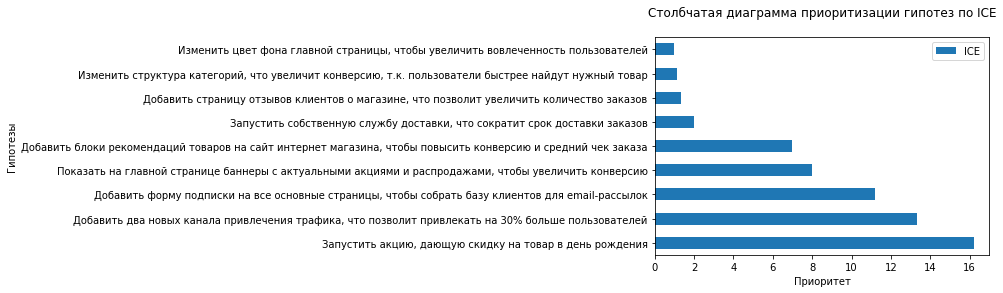

In [5]:
fig = data.sort_values('ICE', ascending = False)[{'Hypothesis', 'ICE'}].set_index('Hypothesis').plot( kind= 'barh')
fig.set_title('Столбчатая диаграмма приоритизации гипотез по ICE\n')
fig.set_ylabel('Гипотезы')
fig.set_xlabel('Приоритет')
plt.show()

По результатам, наиболее перспективные гипотезы по ICE :8-я гипотеза самая перспективная "Запустить акцию, дающую скидку на товар в день рождения", далее идут 0, 7, 6, 2. Остальные наименее перспективные.

Применяем фреймворк RICE для приоритизации гипотез и выводим список отсортированных гипотез по убыванию приоритета.

In [6]:
data['RICE'] = data['Reach'] * data['Impact'] * data['Confidence']/data['Efforts']

display(data.sort_values('RICE', ascending = False)[{'Hypothesis', 'RICE'}])

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


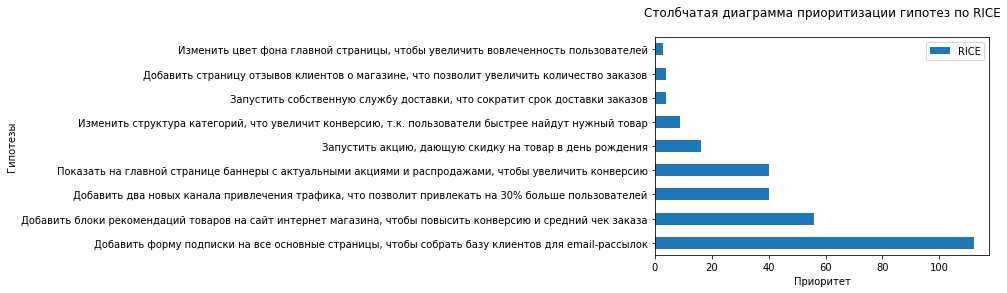

In [7]:
fig = data.sort_values('RICE', ascending = False)[{'Hypothesis', 'RICE'}].set_index('Hypothesis').plot( kind= 'barh')
fig.set_title('Столбчатая диаграмма приоритизации гипотез по RICE\n')
fig.set_ylabel('Гипотезы')
fig.set_xlabel('Приоритет')
plt.show()

По RICE гипотеза 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" стала наиболее перспективным чем остальные, так как значение Reach - 10, то есть охват пользователей у данной гипотезы на все 10 баллов из 10ти. А также, по графикам видим, что те же самые 5 гипотез оказались более перспективными по фреймворкам `ICE` и `RICE` в отличие от остальных 4-х.


## часть. Анализ A/B-теста
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Задачи
- Проанализировать A/B-тест:
- Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
- Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
- Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.
- Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
- Построить точечный график стоимостей заказов. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.

Принять решение по результатам теста и Объяснить его. Варианты решений:

1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

Данные для второй части

Файл /datasets/orders.csv.

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv.
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Проанализировать A/B-тест:
Для начала считаем, присвоим `orders` и `visitors` соответственно, а также выведем основную информацию по данным

In [8]:
orders = pd.read_csv('/datasets/orders.csv')
display(orders)
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
visitors = pd.read_csv('/datasets/visitors.csv')
display(visitors.head(5))
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Приведем столбцы `date` к типу `datetime`

In [10]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders.info()

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Проверим на наличие явных дубликатов

In [11]:
print(orders.duplicated().sum())
visitors.duplicated().sum()

0


0

проверяем корректность разбиения пользователей на группы - может быть есть пользователи, попавшие в обе группы.

In [12]:
#получаем список уникальных id пересечений:

res = set(orders.query('group=="A"')['visitorId'].unique()).intersection(orders.query('group=="B"')['visitorId'].unique())

#при помощи инверсии isin делаем фильтрацию:
print(len(orders))
orders = (orders[~orders['visitorId'].isin(res)])
print(len(orders))


res = set(visitors.query('group=="A"')['visitors'].unique()).intersection(visitors.query('group=="B"')['visitors'].unique())

#при помощи инверсии isin делаем фильтрацию:
print(len(visitors))
visitors = (visitors[~visitors['visitors'].isin(res)])
print(len(visitors))


1197
1016
62
56


### Построить график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [13]:
datesGroups = orders[['date', 'group']].drop_duplicates()

In [14]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

display(ordersAggregated)
display(visitorsAggregated)

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
...,...,...,...,...,...
533,2019-08-29,B,510,490,4746610
757,2019-08-30,A,460,437,3311413
690,2019-08-30,B,531,511,4955833
958,2019-08-31,A,468,445,3364656


,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
757,2019-08-29,A,16219
533,2019-08-29,B,17098
690,2019-08-29,B,17098
930,2019-08-29,B,17098


In [15]:
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,A,451,430,3233233,16219
58,2019-08-29,B,510,490,4746610,17098
59,2019-08-29,B,510,490,4746610,17098
60,2019-08-29,B,510,490,4746610,17098


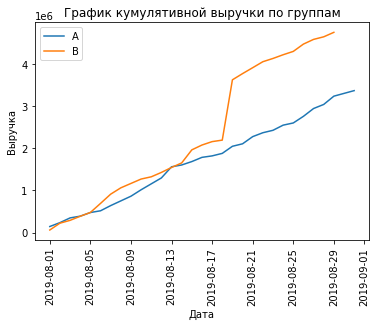

In [16]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
# Строим график выручки группы A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=90)
plt.legend()
plt.title('График кумулятивной выручки по группам')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.show()

По результатам графика видно, что выручка в группе В с 17го по 21е августа 2019 года резко повысилась выручка, возможно это обусловлено резким увеличением количества заказов в интернет магазине, а также закупка на большую сумму

### Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.


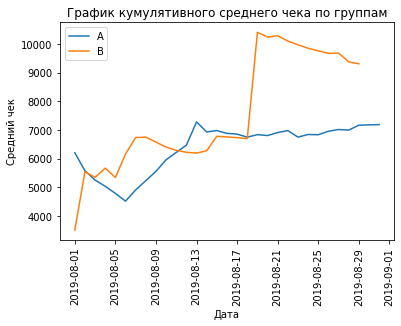

In [17]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xticks(rotation=90)
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.show()

По результатам графика можно также определить резкий рост среднего чека группы В с 17го по 21е августа 2019 г. Это подтверждает возможность заказа на большую сумму


### Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.


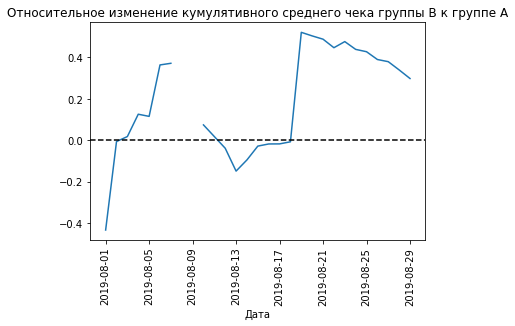

In [18]:
mergedCumulativeRevenue = cumulativeRevenueA[['date','revenue', 'orders']].merge(cumulativeRevenueB[['date','revenue', 'orders']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xticks(rotation=90)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

График изменения кумулятивного среднего чека группы В относительно группы А то резко растет, то резко снижается. Что еще раз подтверждает возможность большого заказа а также не исключено наличие выбросов.

### Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.

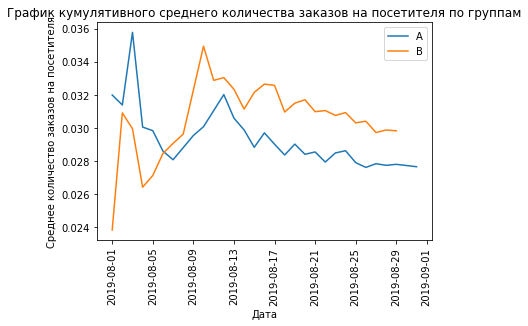

In [19]:
#считаем кумулятивное среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation=90)
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel('Среднее количество заказов на посетителя')
plt.xlabel('Дата')
plt.show()

По данным графика кумулятивного среднего количества заказов на посетителя по группам видно что в начале были некоторые скачки в количествах, но далее можно увидеть что у группы В показатели лучше чем у группы А.


### Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.

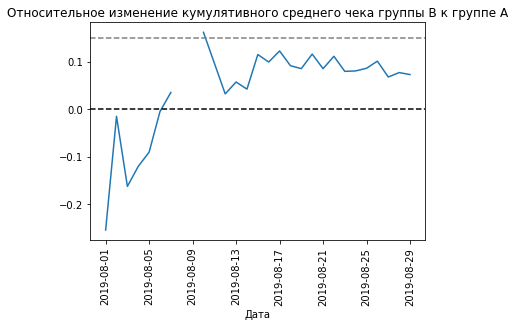

In [20]:
#Объединяем таблицы cumulativeDataA и cumulativeDataB
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.xticks(rotation=90)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.show()

В начале теста группа А лидировала, но с затем мы видим значительный прирост группы В, далее она лидирует по конверсии: становится все лучше и лучше, далее видим небольшой спад, но конце группа В также начал рост около прироста в 15% относительно группы А.

### Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.


Для начала найдем количество заказов каждого пользователя и выведем основные метрики полученной таблицы.

In [21]:
orders_by_users = orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
display(orders_by_users['transactionId'].describe())


count   973.00
mean      1.04
std       0.24
min       1.00
25%       1.00
50%       1.00
75%       1.00
max       3.00
Name: transactionId, dtype: float64

тут мы видим что в основном пользователь делает один заказ, но есть и те, кто оформил 11 заказов. Построим точечный график количества заказов по пользователям.

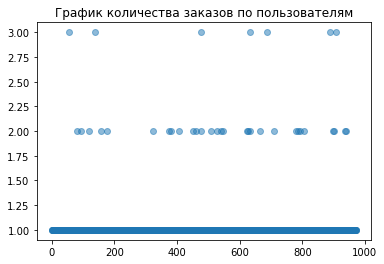

In [22]:
# строим точечную диаграмму
plt.scatter(pd.Series(range(0, len(orders_by_users))), orders_by_users['transactionId'], alpha=0.5)
plt.title('График количества заказов по пользователям')
plt.show()

На графике наглядно видно, что в основном пользователи делают по 1-2 заказа, а также есть пользователи которые оформили 11 заказов

### Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.


Определим 95 и 99 перцентили количества заказов на пользователя

In [23]:
print(np.percentile(orders_by_users['transactionId'], [95, 99])) 

[1. 2.]


Не более 5% пользователей  оформляли больше чем 1го заказа и не более 1% больше 2-х. Разумно выбрать 1 или 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### Построить точечный график стоимостей заказов. Сделать выводы и предположения.


In [24]:
display(orders['revenue'].describe())

count       1,016.00
mean        8,300.81
std        42,121.99
min            50.00
25%         1,190.00
50%         2,955.00
75%         8,134.25
max     1,294,500.00
Name: revenue, dtype: float64

Максимальный заказ на 1294500 когда как медианное значение 9,692.11

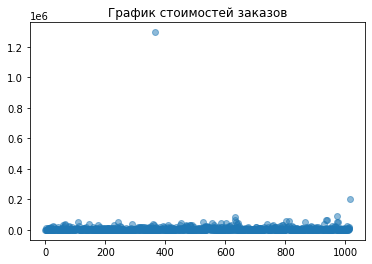

In [25]:
plt.scatter(pd.Series(range(0, len(orders))), orders['revenue'], alpha=0.5)
plt.title('График стоимостей заказов')
plt.show()

В основном заказывают на сумму до 3000, есть большие выбросы аж до 1 миллиона

### Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.


In [26]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


Не более 5% пользователей оформляли заказ больше чем 26785 и не более 1% больше 53904. Можно выбрать эти значения как за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.


Посчитаем статистическую значимость различий в среднем числе заказов на посетителя по «сырым» данным — без удаления аномальных пользователей.
Сформулируем гипотезы. 
- **Нулевая**: Нет различий в среднем количестве заказов между группами. 
- **Альтернативная**: Есть различия в среднем между группами .

In [27]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,19,142779,17,59758,19,142779,17,59758,719.00,713.00,719.00,713.00
1,2019-08-02,18,91602,23,162043,37,234381,40,221801,619.00,581.00,"1,338.00","1,294.00"
2,2019-08-03,24,112473,14,67049,61,346854,54,288850,507.00,509.00,"1,845.00","1,803.00"
3,2019-08-04,11,41176,14,96890,72,388030,68,385740,717.00,770.00,"2,562.00","2,573.00"
4,2019-08-05,22,86383,21,89908,94,474413,89,475648,756.00,707.00,"3,318.00","3,280.00"


Наименования столбцов:
- `date` — дата;
- `ordersPerDateA` — количество заказов в выбранную дату в группе A;
- `revenuePerDateB` — суммарная выручка в выбранную дату в группе B;
- `ordersCummulativeA` — суммарное число заказов до выбранной даты включительно в группе A;
- `revenueCummulativeA` — суммарная выручка до выбранной даты включительно в группе A;
- `ordersCummulativeB` — суммарное количество заказов до выбранной даты включительно в группе B;
- `revenueCummulativeB` — суммарная выручка до выбранной даты включительно в группе B;
- `visitorsPerDateA` — количество пользователей в выбранную дату в группе A;
- `visitorsPerDateB` — количество пользователей в выбранную дату в группе B;
- `visitorsCummulativeA` — количество пользователей до выбранной даты включительно в группе A;
- `visitorsCummulativeB` — количество пользователей до выбранной даты включительно в группе B.

Создадим переменные `ordersByUsersA` и `ordersByUsersB` со столбцами `['userId', 'orders']`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [28]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']


Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [29]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.


In [30]:
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.011
0.159


Вывод: По «сырым» данным различия есть в среднем количестве заказов групп A и B. 
Первое число — p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что нет статистически значимых различий в среднем числе заказов между группами, отвергаем. 
Относительный прирост группы B равен 15.9% — второе число в выводе.

### Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.


Найдём относительные различия в среднем чеке между группами по "сырым" данным — без удаления аномальных пользователей.
Сформулируем гипотезы. 
- **Нулевая**:  нет различий в среднем чеке заказов между группами. 
- **Альтернативная**: есть различия в среднем чеке между группами .

In [31]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value = 0.829
0.287


Вывод: По «сырым» данным различиий нет в среднем чеке заказа между группами A и B. Первое число — p-value = 0.829 больше 0.05. Значит, нулевую гипотезу не отвергаем. Наблюдается относительное различие в 28.7% среднего чека группы В, не является статистически значимым.

### Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.


Примем за аномальных пользователей тех, кто совершил от 1 заказов или совершил заказ дороже 53 904. Так мы уберём 1% пользователей с наибольшим числом заказов и 1% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 1 — `usersWithManyOrders` и пользователей, совершивших заказы дороже  53 904 — `usersWithExpensiveOrders`. Объединим их в таблице `abnormalUsers`. 
Узнаем, сколько всего аномальных пользователей атрибутом `shape`.

In [32]:
revenue_lim = np.percentile(orders['revenue'], 99)

orders_lim = 1

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > orders_lim]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > orders_lim]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_lim]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 


1099    148427295
33      249864742
36      366673373
51      406208401
67      522292794
dtype: int64
45


Всего 15 аномальных пользователей. 

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:


In [33]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [34]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value = 0.009
0.186


Результаты по среднему количеству заказов практически не изменились. 
Так же: различия есть в среднем количестве заказов групп A и B. 

Первое число — p-value = 0.01 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. 

Произошло ли что-нибудь с результатами по среднему чеку после "очищения"?

### Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.

In [35]:
print(
    'p-value = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value = 0.969
0.002


P-value значительно больше 0.05. Значит не отвергаем нулевую гипотезу, о том что нет различий в среднем чеке заказов между группами. Наблюдается относительное различие в -3.2% среднего чека группы

## Общие выводы по проекту





- Есть статистически значимые различия по среднему количеству заказов между группами и по «сырым», и по данным после фильтрации аномалий; Разница около 14% и 15% в пользу группы В. 

- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;

- По данным графика кумулятивного среднего количества заказов на посетителя по группам видно что в начале были некоторые скачки в количествах, но далее можно увидеть что у группы В показатели лучше чем у группы А.

- График относительного изменения кумулятивного среднего количества заказов на посетителя говорит о том, в начале теста группа А лидировала, но с затем мы видим значительный прирост группы В, далее она лидирует по конверсии: становится все лучше и лучше, далее видим небольшой спад, но конце группа В также начал рост около прироста в 15% относительно группы А.

**Исходя из обнаруженных фактов, тест следует остановить и признать победу группы B, так как среднее количество заказов на посетителя группы B значительно выше группы A.** 